In [1]:
#INR-EUR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time
from pandas import read_csv

Using TensorFlow backend.


In [3]:
input_file="eur-inr-5-nh.csv"

In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
np.random.seed(5)

In [6]:
df=read_csv(input_file,header=None,index_col=None,delimiter=',')

In [7]:
all_y = df[1].values
dataset=all_y.reshape(-1, 1)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [31]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [32]:
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000
694/694 [==============================] - 2s 2ms/step - loss: 0.1015
Epoch 2/1000
694/694 [==============================] - 0s 233us/step - loss: 0.0274
Epoch 3/1000
694/694 [==============================] - 0s 282us/step - loss: 0.0147
Epoch 4/1000
694/694 [==============================] - 0s 500us/step - loss: 0.0122
Epoch 5/1000
694/694 [==============================] - 0s 283us/step - loss: 0.0101
Epoch 6/1000
694/694 [==============================] - 0s 264us/step - loss: 0.0106
Epoch 7/1000
694/694 [==============================] - 0s 276us/step - loss: 0.0097
Epoch 8/1000
694/694 [==============================] - 0s 250us/step - loss: 0.0092
Epoch 9/1000
694/694 [==============================] - 0s 265us/step - loss: 0.0094
Epoch 10/1000
694/694 [==============================] - 0s 271us/step - loss: 0.0080
Epoch 11/1000
694/694 [==============================] - 0s 275us/step - loss: 0.0076
Epoch 12/1000
694/694 [==============================] - 0s 236us

694/694 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 191/1000
694/694 [==============================] - 0s 111us/step - loss: 0.0015
Epoch 192/1000
694/694 [==============================] - 0s 110us/step - loss: 0.0017
Epoch 193/1000
694/694 [==============================] - 0s 210us/step - loss: 0.0018
Epoch 194/1000
694/694 [==============================] - 0s 272us/step - loss: 0.0016
Epoch 195/1000
694/694 [==============================] - 0s 215us/step - loss: 0.0017
Epoch 196/1000
694/694 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 197/1000
694/694 [==============================] - 0s 227us/step - loss: 0.0021
Epoch 198/1000
694/694 [==============================] - 0s 274us/step - loss: 0.0018
Epoch 199/1000
694/694 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 200/1000
694/694 [==============================] - 0s 94us/step - loss: 0.0015
Epoch 201/1000
694/694 [==============================] - 0s

694/694 [==============================] - 0s 86us/step - loss: 0.0010
Epoch 378/1000
694/694 [==============================] - 0s 102us/step - loss: 8.8922e-04
Epoch 379/1000
694/694 [==============================] - 0s 145us/step - loss: 9.1744e-04
Epoch 380/1000
694/694 [==============================] - 0s 121us/step - loss: 8.8998e-04
Epoch 381/1000
694/694 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 382/1000
694/694 [==============================] - 0s 98us/step - loss: 0.0010
Epoch 383/1000
694/694 [==============================] - 0s 96us/step - loss: 0.0011
Epoch 384/1000
694/694 [==============================] - 0s 178us/step - loss: 9.5280e-04
Epoch 385/1000
694/694 [==============================] - 0s 230us/step - loss: 8.6403e-04
Epoch 386/1000
694/694 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 387/1000
694/694 [==============================] - 0s 231us/step - loss: 9.6546e-04
Epoch 388/1000
694/694 [=============

Epoch 468/1000
694/694 [==============================] - 0s 94us/step - loss: 7.3060e-04
Epoch 469/1000
694/694 [==============================] - 0s 112us/step - loss: 7.5652e-04
Epoch 470/1000
694/694 [==============================] - 0s 83us/step - loss: 9.6656e-04
Epoch 471/1000
694/694 [==============================] - 0s 100us/step - loss: 7.1007e-04
Epoch 472/1000
694/694 [==============================] - 0s 91us/step - loss: 7.9730e-04
Epoch 473/1000
694/694 [==============================] - 0s 95us/step - loss: 7.5237e-04
Epoch 474/1000
694/694 [==============================] - 0s 90us/step - loss: 8.2074e-04
Epoch 475/1000
694/694 [==============================] - 0s 84us/step - loss: 7.6550e-04
Epoch 476/1000
694/694 [==============================] - 0s 120us/step - loss: 8.1777e-04
Epoch 477/1000
694/694 [==============================] - 0s 80us/step - loss: 8.0910e-04
Epoch 478/1000
694/694 [==============================] - 0s 84us/step - loss: 7.1403e-04
Epoch 4

694/694 [==============================] - 0s 87us/step - loss: 6.9693e-04
Epoch 649/1000
694/694 [==============================] - 0s 81us/step - loss: 7.3574e-04
Epoch 650/1000
694/694 [==============================] - 0s 111us/step - loss: 6.2369e-04
Epoch 651/1000
694/694 [==============================] - 0s 106us/step - loss: 5.2878e-04
Epoch 652/1000
694/694 [==============================] - 0s 119us/step - loss: 6.3202e-04
Epoch 653/1000
694/694 [==============================] - 0s 126us/step - loss: 6.1430e-04
Epoch 654/1000
694/694 [==============================] - 0s 186us/step - loss: 5.4982e-04
Epoch 655/1000
694/694 [==============================] - 0s 119us/step - loss: 6.0820e-04
Epoch 656/1000
694/694 [==============================] - 0s 135us/step - loss: 6.3065e-04
Epoch 657/1000
694/694 [==============================] - 0s 111us/step - loss: 6.0818e-04
Epoch 658/1000
694/694 [==============================] - 0s 129us/step - loss: 6.9865e-04
Epoch 659/1000
6

694/694 [==============================] - 0s 133us/step - loss: 5.5953e-04
Epoch 829/1000
694/694 [==============================] - 0s 198us/step - loss: 6.4101e-04
Epoch 830/1000
694/694 [==============================] - 0s 158us/step - loss: 6.4000e-04
Epoch 831/1000
694/694 [==============================] - 0s 110us/step - loss: 5.3616e-04
Epoch 832/1000
694/694 [==============================] - 0s 81us/step - loss: 5.2744e-04
Epoch 833/1000
694/694 [==============================] - 0s 254us/step - loss: 5.5717e-04
Epoch 834/1000
694/694 [==============================] - 0s 145us/step - loss: 6.0005e-04
Epoch 835/1000
694/694 [==============================] - 0s 125us/step - loss: 6.8904e-04
Epoch 836/1000
694/694 [==============================] - 0s 159us/step - loss: 6.6220e-04
Epoch 837/1000
694/694 [==============================] - 0s 124us/step - loss: 7.4789e-04
Epoch 838/1000
694/694 [==============================] - 0s 171us/step - loss: 6.8306e-04
Epoch 839/1000


In [35]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [36]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [37]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.39 RMSE
Test Score: 0.53 RMSE


In [38]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [39]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:


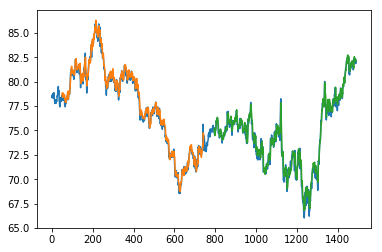

In [40]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
plt.plot(testPredictPlot)
plt.show()

In [41]:
print('testPredictions:')
print(testPredict)

testPredictions:
[[75.20253 ]
 [74.84577 ]
 [74.718025]
 [74.463394]
 [74.680664]
 [74.99966 ]
 [74.930305]
 [74.97599 ]
 [75.14074 ]
 [75.24119 ]
 [75.75528 ]
 [76.07164 ]
 [75.79641 ]
 [76.06011 ]
 [76.17802 ]
 [76.19838 ]
 [76.34551 ]
 [76.25948 ]
 [75.99743 ]
 [75.87291 ]
 [75.65312 ]
 [75.049286]
 [75.03121 ]
 [74.9781  ]
 [74.766205]
 [74.73449 ]
 [74.46188 ]
 [74.343956]
 [74.645226]
 [74.645935]
 [74.68714 ]
 [75.1156  ]
 [75.05631 ]
 [74.78298 ]
 [74.76737 ]
 [74.810745]
 [74.66251 ]
 [74.36978 ]
 [74.1775  ]
 [74.16106 ]
 [74.00923 ]
 [74.03987 ]
 [74.14513 ]
 [74.080154]
 [74.26375 ]
 [74.36409 ]
 [74.29195 ]
 [74.678894]
 [74.74799 ]
 [74.62114 ]
 [74.75691 ]
 [74.53831 ]
 [74.77481 ]
 [74.95864 ]
 [74.93652 ]
 [74.98684 ]
 [75.247925]
 [75.0681  ]
 [75.12266 ]
 [75.17335 ]
 [75.27824 ]
 [75.286026]
 [75.2135  ]
 [75.10349 ]
 [75.21547 ]
 [76.36822 ]
 [76.75896 ]
 [76.46657 ]
 [76.4791  ]
 [76.77927 ]
 [76.26093 ]
 [76.013504]
 [75.95125 ]
 [75.87691 ]
 [75.88285 ]
 [75.691